In [154]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow import keras

import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [155]:
PATH = "../data/unpacked/characters"

characters = os.listdir(PATH)

im_arr=[]
lb_arr=[]
for i, character in enumerate(characters):
    path = os.path.join(PATH, character)

    for d in sorted(os.listdir(path)):
        img = cv2.imread(os.path.join(path, d),0)
        img = cv2.resize(img, (28, 28))

        temp_arr=img
        temp_arr=temp_arr[np.newaxis,:,:]
        if len(im_arr)==0:
            im_arr=temp_arr
        else:
            im_arr=np.concatenate((im_arr,temp_arr),axis=0)
        lb_arr.append(character)

In [156]:
lb_arr=np.array(lb_arr)

In [157]:
# convert the labels to one-hot encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(lb_arr)
new_labels = le.transform(lb_arr)
# le.inverse_transform(df['categorical_label'])


Prepare the data

In [158]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(im_arr, new_labels, test_size=0.2, random_state=42, stratify=new_labels)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [159]:
# print the shapes of the data
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4429, 28, 28)
X_test shape: (1108, 28, 28)
y_train shape: (4429,)
y_test shape: (1108,)


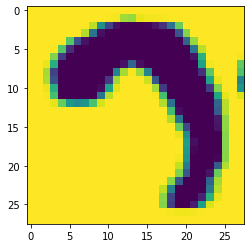

In [160]:
#show an image
plt.imshow(X_train[0])

In [161]:
# Creating the model
model = models.Sequential([
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(27, activation='softmax')
])

In [162]:
# print model shape
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 4732)              0         
                                                                 
 dense_20 (Dense)            (None, 128)               605824    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 27)                3483      
                                                     

In [163]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [164]:
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

In [171]:
history = model.fit(x=x_train, y=y_train, epochs=20,batch_size=64,
                   validation_data=(x_test, y_test), callbacks=callbacks, validation_split=0.2)

Epoch 1/20
70/70 [==============================] - 2s 27ms/step - loss: 1.8634 - sparse_categorical_accuracy: 0.5455 - val_loss: 0.7883 - val_sparse_categorical_accuracy: 0.8042
Epoch 2/20
70/70 [==============================] - 2s 27ms/step - loss: 0.6247 - sparse_categorical_accuracy: 0.8345 - val_loss: 0.5610 - val_sparse_categorical_accuracy: 0.8366
Epoch 3/20
70/70 [==============================] - 2s 30ms/step - loss: 0.4285 - sparse_categorical_accuracy: 0.8839 - val_loss: 0.4227 - val_sparse_categorical_accuracy: 0.8845
Epoch 4/20
70/70 [==============================] - 2s 27ms/step - loss: 0.3244 - sparse_categorical_accuracy: 0.9070 - val_loss: 0.4023 - val_sparse_categorical_accuracy: 0.8971
Epoch 5/20
70/70 [==============================] - 2s 28ms/step - loss: 0.2460 - sparse_categorical_accuracy: 0.9291 - val_loss: 0.3623 - val_sparse_categorical_accuracy: 0.8971
Epoch 6/20
70/70 [==============================] - 2s 27ms/step - loss: 0.2080 - sparse_categorical_accu

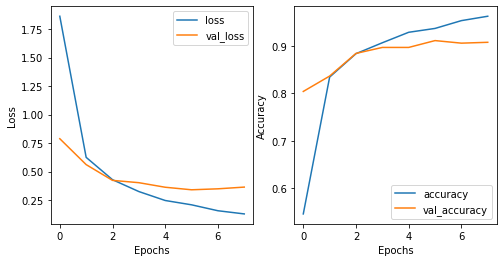

In [172]:
# plot the loss and accuracy curves for training and validation
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#plot model accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["sparse_categorical_accuracy"], label="accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()



